Imaginem que vocês querem avaliar a mobilidade no entorno da UFRN, em Natal/RN
- Quais bairros analisar?
- Onde eu poderia colocar dock-station(s) de compartilhamento de bibliotecas?
- Desconsidere paradas de ônibus.

## Requisito 1
Usar na solução as métricas de centralidade vistas em sala, e imagens da rede destacadas pelas métricas.
- Centralidade de Grau: Número de conexões
- Centralidade de proximidade : Distância média para todos os outros vértices
- Centralidade de intermediação : Posição no caminho mais curto (intermediação)
- Centralidade de autovetor: Pontuação de autoridade com base na pontuação dos vizinhos

In [1]:
!pip install osmnx networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 36.8 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

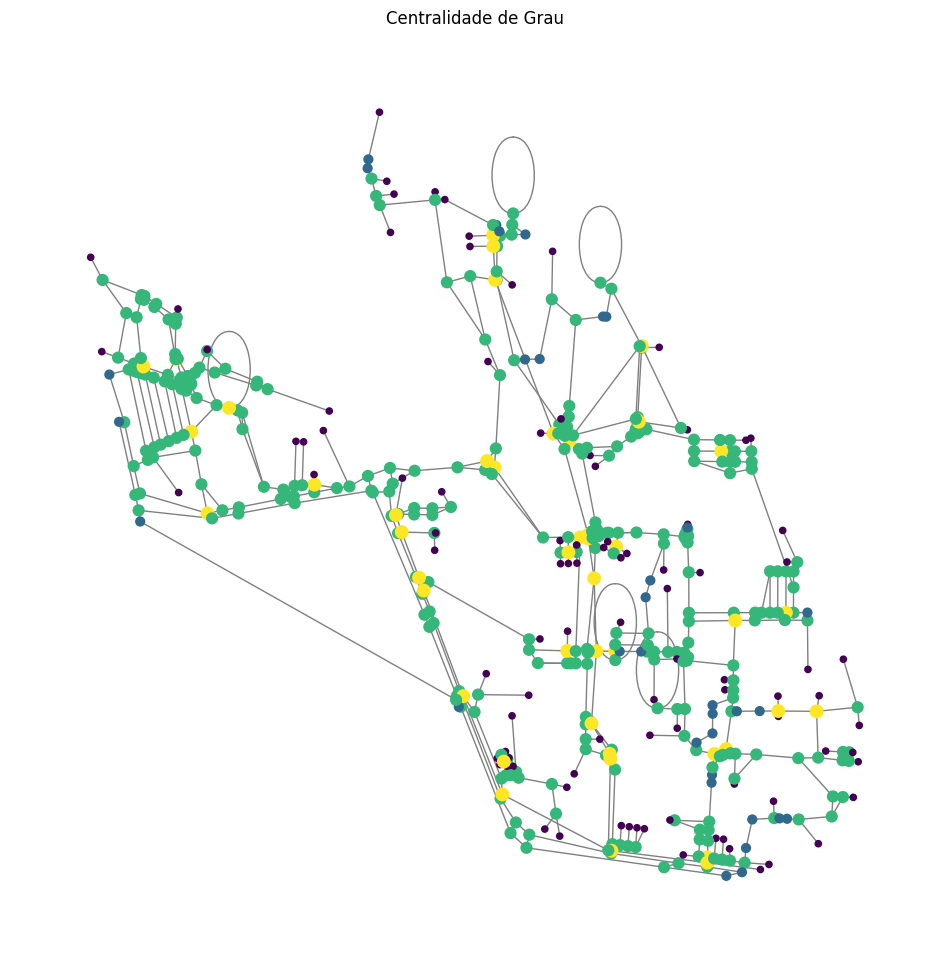

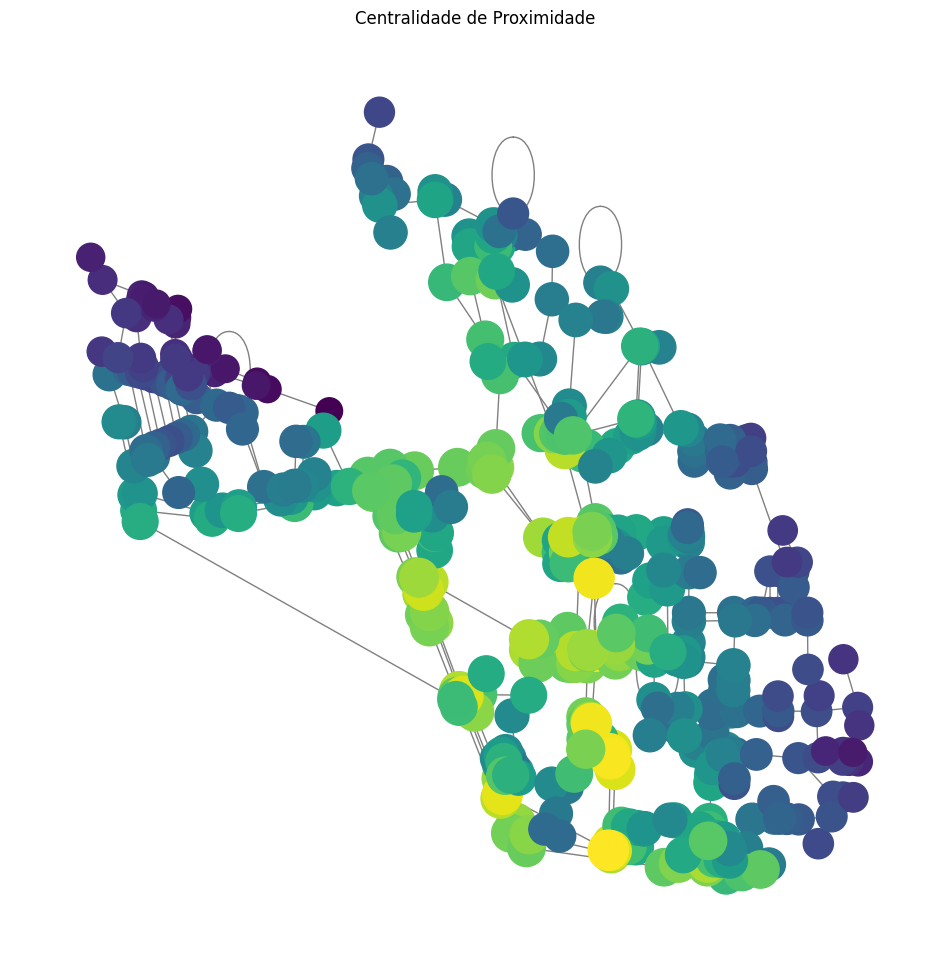

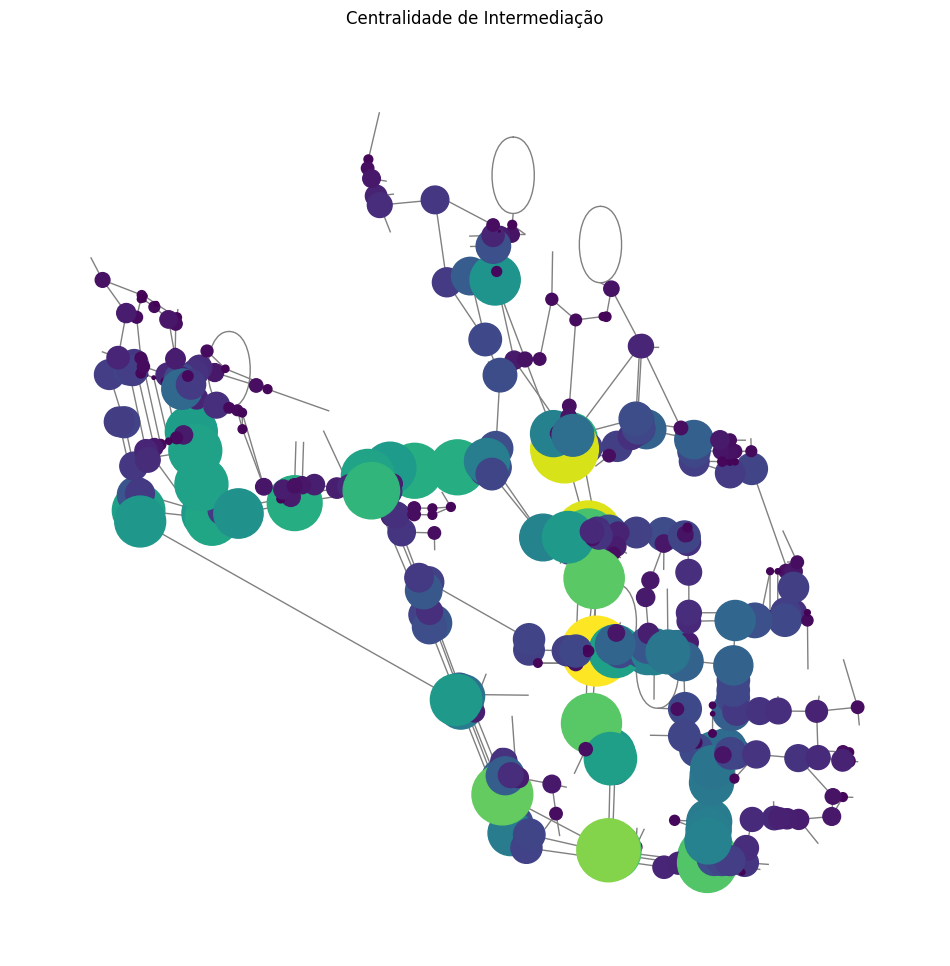

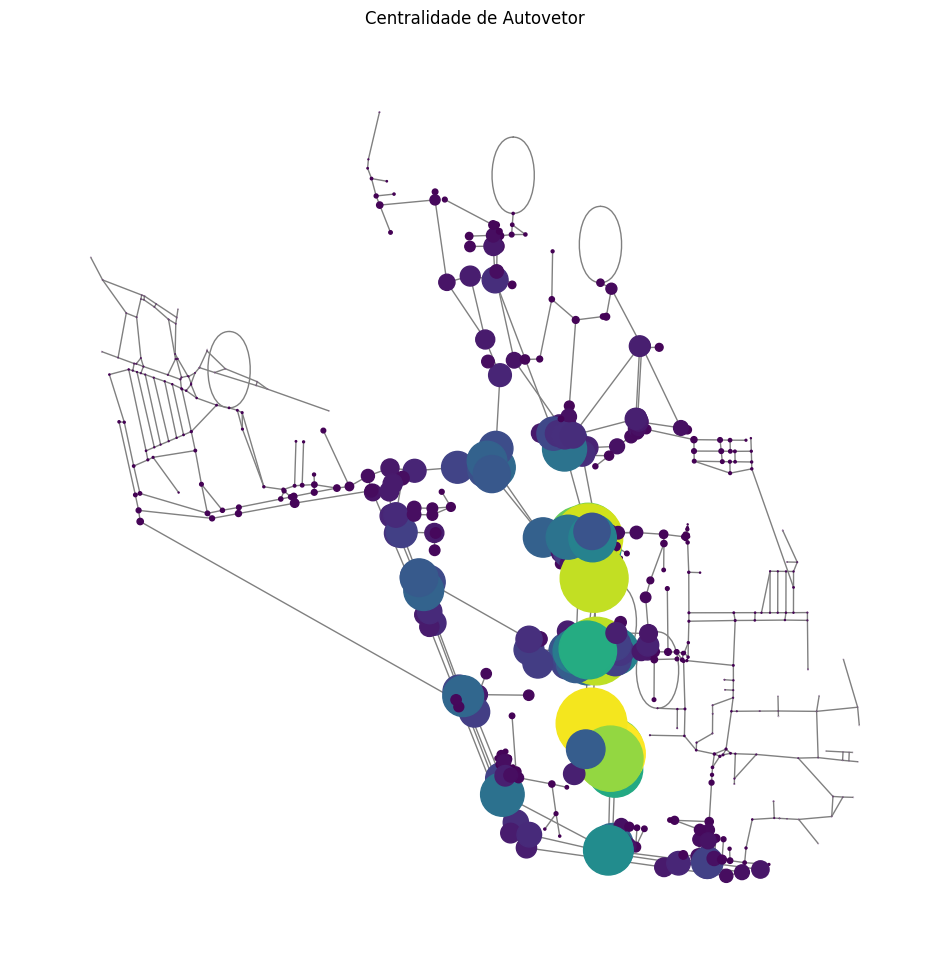

In [ ]:
# 1. Baixar o grafo da rede de ruas no entorno da UFRN
place_name = "Universidade Federal do Rio Grande do Norte, Natal, Brazil"
G = ox.graph_from_place(place_name, network_type='bike')

# Converter o grafo para um grafo simples (sem arestas múltiplas)
G_simple = nx.Graph(G)

# 2. Calcular as métricas de centralidade com ajuste em `eigenvector_centrality`
degree_centrality = nx.degree_centrality(G_simple)
closeness_centrality = nx.closeness_centrality(G_simple)
betweenness_centrality = nx.betweenness_centrality(G_simple, normalized=True)

# Centralidade de autovetor com mais iterações e vetor inicial
try:
    eigenvector_centrality = nx.eigenvector_centrality(G_simple, max_iter=500, tol=1e-06)
except nx.PowerIterationFailedConvergence:
    print("Centralidade de autovetor não convergiu.")

# 3. Adicionar as métricas como atributos de cada nó (se convergiu)
nx.set_node_attributes(G_simple, degree_centrality, 'degree')
nx.set_node_attributes(G_simple, closeness_centrality, 'closeness')
nx.set_node_attributes(G_simple, betweenness_centrality, 'betweenness')

if 'eigenvector_centrality' in locals():
    nx.set_node_attributes(G_simple, eigenvector_centrality, 'eigenvector')

# 4. Função para plotar a rede com destaque para uma métrica
def plot_graph_with_centrality(G, centrality, title):
    fig, ax = plt.subplots(figsize=(12, 12))
    node_colors = [centrality[node] for node in G.nodes if node in centrality]
    node_size = [v * 10000 for v in node_colors]  # Escala para visualização

    pos = {node: (data['x'], data['y']) for node, data in G.nodes(data=True)}

    nx.draw(
        G,
        pos,
        ax=ax,
        node_color=node_colors,
        node_size=node_size,
        with_labels=False,
        edge_color="gray",
        cmap=plt.cm.viridis,
        vmin=min(node_colors),
        vmax=max(node_colors),
    )
    ax.set_title(title)
    plt.show()

# 5. Plotar a rede com as diferentes métricas de centralidade
plot_graph_with_centrality(G_simple, degree_centrality, 'Centralidade de Grau')
plot_graph_with_centrality(G_simple, closeness_centrality, 'Centralidade de Proximidade')
plot_graph_with_centrality(G_simple, betweenness_centrality, 'Centralidade de Intermediação')

if 'eigenvector_centrality' in locals():
    plot_graph_with_centrality(G_simple, eigenvector_centrality, 'Centralidade de Autovetor')


### Teste2
UFRN + Capim Macio + Lagoa Nova

<ipython-input-9-cba9b5498ae7>:12: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(north, south, east, west, network_type='bike')
<ipython-input-9-cba9b5498ae7>:12: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = ox.graph_from_bbox(north, south, east, west, network_type='bike')


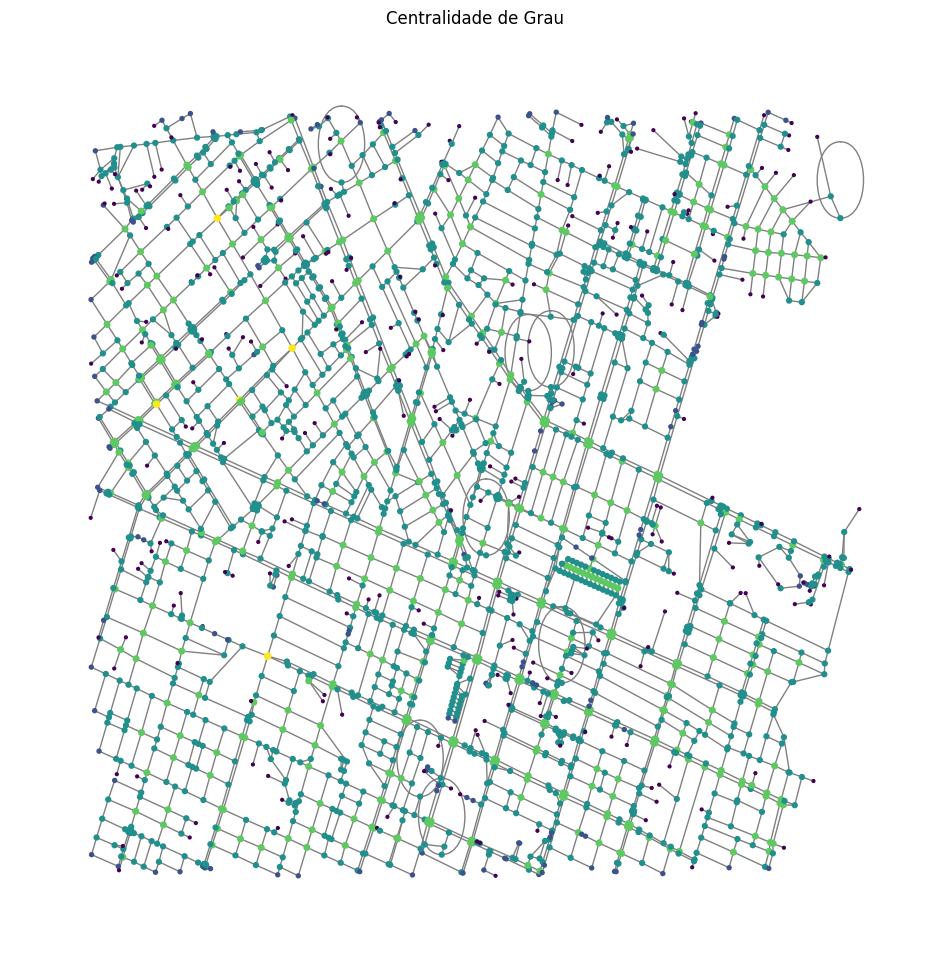

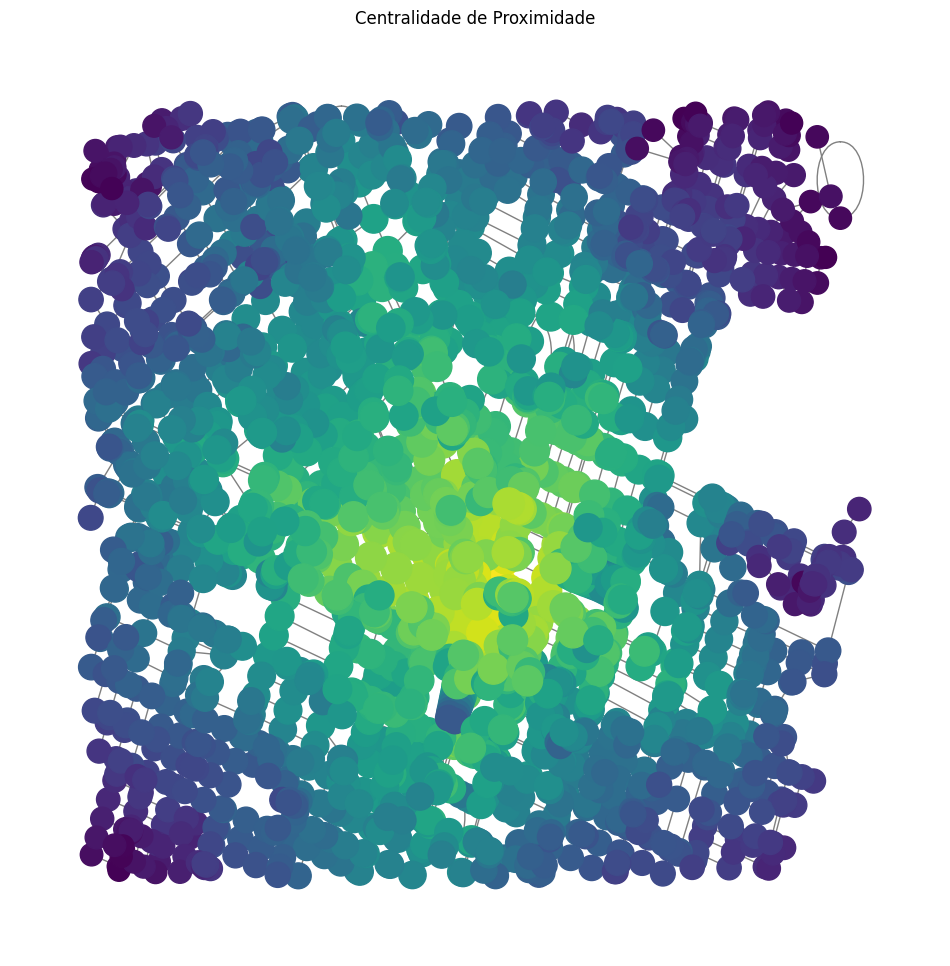

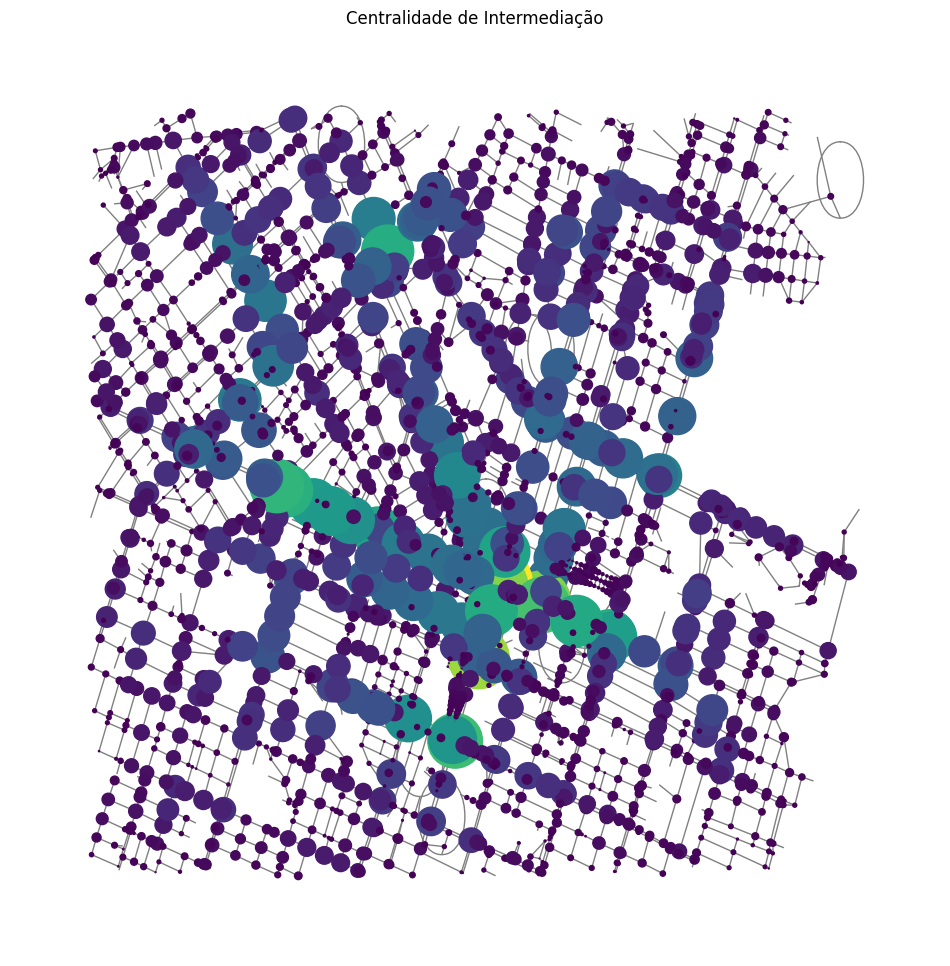

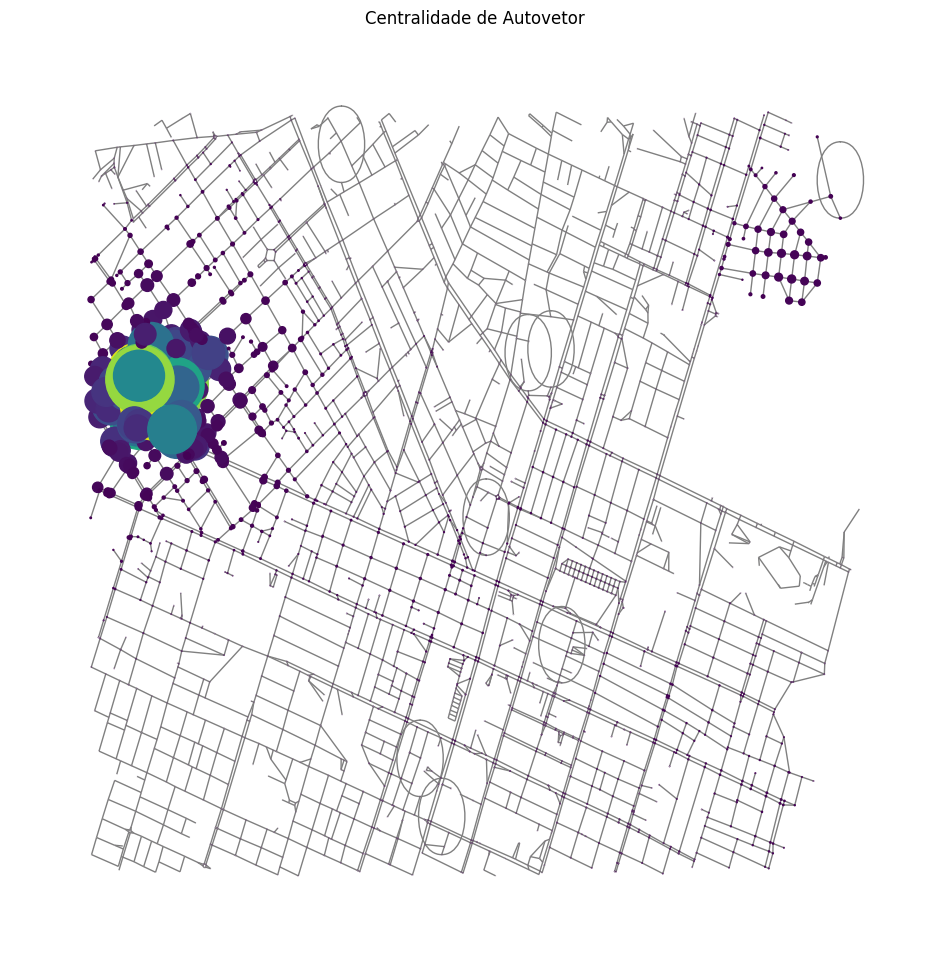

In [ ]:
# 1. Definir a caixa delimitadora que inclui UFRN, Lagoa Nova e Capim Macio
north = -5.795  # Latitude norte
south = -5.821  # Latitude sul
east = -35.194  # Longitude leste
west = -35.227  # Longitude oeste

# Obter o grafo da área delimitada
G = ox.graph_from_bbox(north, south, east, west, network_type='bike')

# Converter o grafo para um grafo simples (sem arestas múltiplas)
G_simple = nx.Graph(G)

# 2. Calcular as métricas de centralidade
degree_centrality = nx.degree_centrality(G_simple)
closeness_centrality = nx.closeness_centrality(G_simple)
betweenness_centrality = nx.betweenness_centrality(G_simple, normalized=True)

# Centralidade de autovetor com mais iterações e vetor inicial
try:
    eigenvector_centrality = nx.eigenvector_centrality(G_simple, max_iter=500, tol=1e-06)
except nx.PowerIterationFailedConvergence:
    print("Centralidade de autovetor não convergiu.")

# 3. Adicionar as métricas como atributos de cada nó
nx.set_node_attributes(G_simple, degree_centrality, 'degree')
nx.set_node_attributes(G_simple, closeness_centrality, 'closeness')
nx.set_node_attributes(G_simple, betweenness_centrality, 'betweenness')

if 'eigenvector_centrality' in locals():
    nx.set_node_attributes(G_simple, eigenvector_centrality, 'eigenvector')

# 4. Função para plotar a rede com destaque para uma métrica
def plot_graph_with_centrality(G, centrality, title):
    fig, ax = plt.subplots(figsize=(12, 12))
    node_colors = [centrality[node] for node in G.nodes if node in centrality]
    node_size = [v * 10000 for v in node_colors]  # Escala para visualização

    pos = {node: (data['x'], data['y']) for node, data in G.nodes(data=True)}

    nx.draw(
        G,
        pos,
        ax=ax,
        node_color=node_colors,
        node_size=node_size,
        with_labels=False,
        edge_color="gray",
        cmap=plt.cm.viridis,
        vmin=min(node_colors),
        vmax=max(node_colors),
    )
    ax.set_title(title)
    plt.show()

# 5. Plotar a rede com as diferentes métricas de centralidade
plot_graph_with_centrality(G_simple, degree_centrality, 'Centralidade de Grau')
plot_graph_with_centrality(G_simple, closeness_centrality, 'Centralidade de Proximidade\nDistância média para todos os outros vértices')
plot_graph_with_centrality(G_simple, betweenness_centrality, 'Centralidade de Intermediação')

if 'eigenvector_centrality' in locals():
    plot_graph_with_centrality(G_simple, eigenvector_centrality, 'Centralidade de Autovetor')


## Requisito 2
Para UFRN + Capim Macio + Lagoa Nova

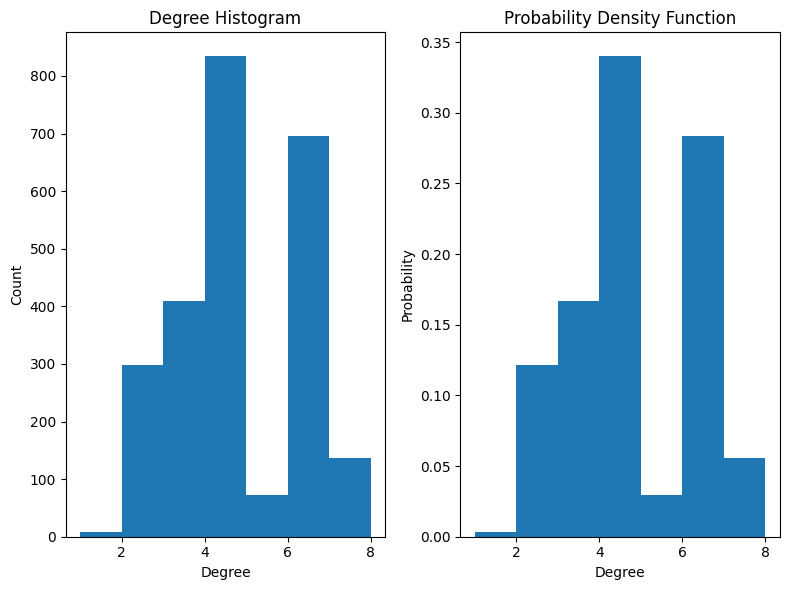

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,6))

# all_data has information about degree_sequence and the width of each bin
all_data = ax[0].hist(degree_sequence,bins=7)
ax[1].hist(degree_sequence,bins=7,density=True)

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")

ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Degree")

plt.tight_layout()
plt.show()

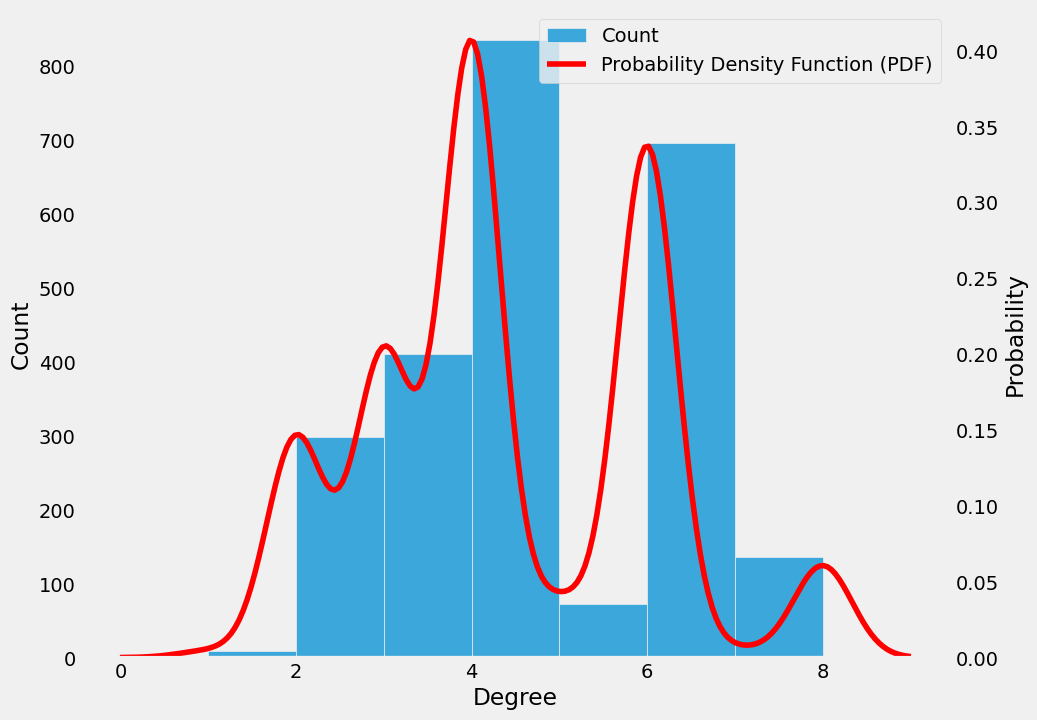

In [ ]:

plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

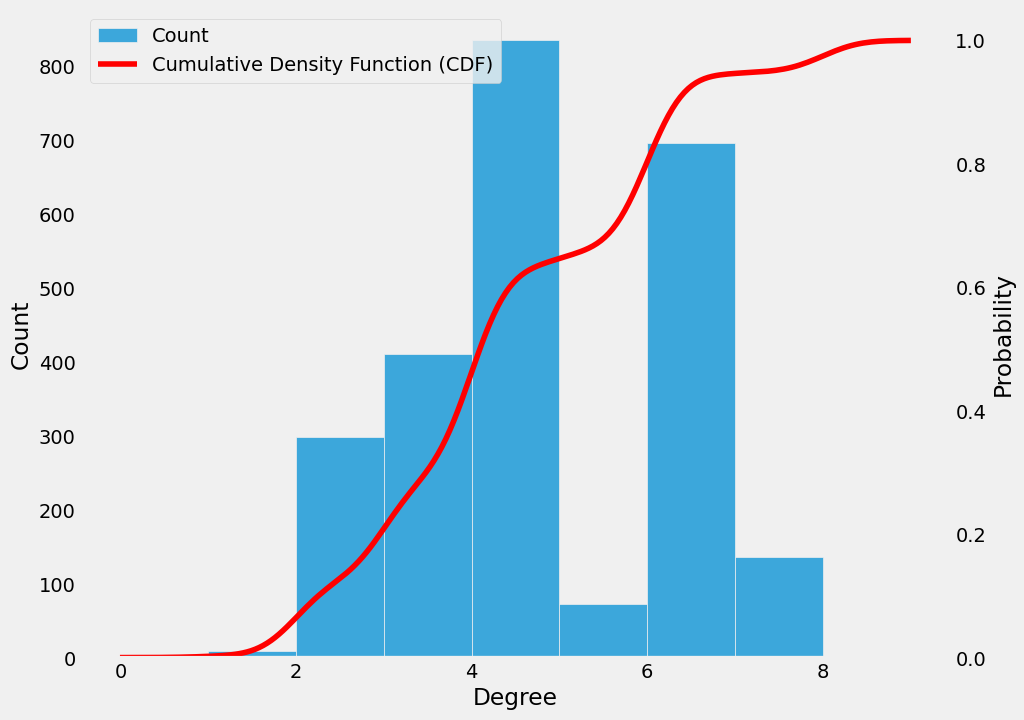

In [ ]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('cumulative_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()